Tensorflow_basic_6

* 순환신경망(RNN) -

일반 신경망(NN) 과의 차이-

*은닉층의 활성화 함수가 relu 가 아닌 tanh,

*은닉층의 출력값을 출력층에 전달하는 동시, 값이 다시 순환되어 은닉층의 입력값으로 들어감.

*순서(sequence) 가 있는 데이터를 처리하는데 강점을 가진 신경망

---> 문장이나 음성같은 연속적 데이터, 문장에서 놓여진 위치(순서) 에 따라 의미가 달라짐.

**RNN 의 순환 구조를 이용해 과거 데이터를 기억, 새로운 입력데이터와 연결시켜서 의미를 알아냄.

*시간의 경과에 따라 데이터가 순차적으로 들어오는 개념으로도 적용 가능.

-------------------------------------------------------------------------------------

* SimpleRNN Example - 

*가장 간단한 형태의 RNN layer

시계열 기반의 RNN 구조 --> w, h 값 설정

*w - 이전 데이터 몇개를 묶을 것인지(윈도우 크기), h - 얼마나 먼 미래 값을 예측할 것인지(수평선 계수),

RNN layer 입력데이터 형태 - (batch_size, time steps, input dims)

*batch_size = time steps 로 분리돼있는 데이터 총 갯수

*time steps = 윈도우 크기와 동일

*input dims = RNN layer 로 한번에 들어가는 데이터 수

Example)

In [1]:
#임포트 및 예제 시계열 데이터 정의

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import Sequential

x = np.arange(0, 100, 0.1)
y = 0.5*np.sin(2*x) - np.cos(x/2.0)
#1000 개의 시계열 데이터 예제

seq_data = y.reshape(-1, 1)
#RNN 입력데이터 형태로 쉽게 만들기 위해 (1000, 1) 행렬로 변환

print(seq_data.shape)
print(seq_data[:5])

(1000, 1)
[[-1.        ]
 [-0.89941559]
 [-0.80029499]
 [-0.70644984]
 [-0.62138853]]


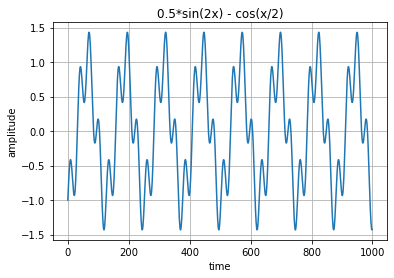

In [4]:
plt.grid()
plt.title('0.5*sin(2x) - cos(x/2)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)

plt.show()

In [7]:
#입력데이터 X, 정답 데이터 y 생성

def seq2(seq, window, horizon):
    
    X = []
    #입력 데이터 리스트
    Y = []
    #정답 데이터 리스트
    
    for i in range(len(seq) - (window + horizon) + 1):
        
        x = seq[i:(i + window)]
        y = (seq[i + window + horizon - 1])
        
        X.append(x)
        Y.append(y)
    
    return np.array(X),  np.array(Y)

w = 20
#window size
h = 1
#horizon factor

X, y = seq2(seq_data, w, h)
print(X.shape, y.shape)

(980, 20, 1) (980, 1)


In [8]:
#트레이닝/ 테스트 데이터 분리

split_ratio = 0.8

split = int(split_ratio * len(X))

xtr = X[0: split]
ytr = y[0: split]

xt = X[split:]
yt = y[split:]

print(xtr.shape, ytr.shape, xt.shape, yt.shape)
#train data - 784 개
#test data - 196 개

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


In [11]:
#SimpleRNN 모델링

md = Sequential()

md.add(SimpleRNN(units = 128, activation = 'tanh', input_shape = \
                xtr[0].shape))
#은닉층에 tanh 를 활성화 함수로 가지는 노드 수 = 128 개
#input_shape = (20, 1) 형태
md.add(Dense(1))
#한 개의 출력층

md.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [12]:
#컴파일 및 학습

md.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

hist = md.fit(xtr, ytr, epochs = 100, validation_data = (xt, yt))

Epoch 1/100
25/25 [==============================] - 2s 23ms/step - loss: 0.0365 - mae: 0.1340 - val_loss: 0.0051 - val_mae: 0.0578
Epoch 2/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0025 - mae: 0.0397 - val_loss: 0.0015 - val_mae: 0.0304
Epoch 3/100
25/25 [==============================] - 0s 9ms/step - loss: 9.2691e-04 - mae: 0.0234 - val_loss: 5.6955e-04 - val_mae: 0.0185
Epoch 4/100
25/25 [==============================] - 0s 9ms/step - loss: 4.7819e-04 - mae: 0.0168 - val_loss: 3.8228e-04 - val_mae: 0.0159
Epoch 5/100
25/25 [==============================] - 0s 9ms/step - loss: 3.5754e-04 - mae: 0.0144 - val_loss: 2.0120e-04 - val_mae: 0.0104
Epoch 6/100
25/25 [==============================] - 0s 9ms/step - loss: 2.7095e-04 - mae: 0.0127 - val_loss: 1.9210e-04 - val_mae: 0.0104
Epoch 7/100
25/25 [==============================] - 0s 9ms/step - loss: 2.2039e-04 - mae: 0.0117 - val_loss: 1.4565e-04 - val_mae: 0.0085
Epoch 8/100
25/25 [======================

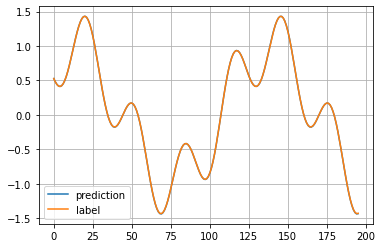

In [14]:
#정확도

pred = md.predict(xt)

plt.plot(pred, label = 'prediction')
plt.plot(yt, label = 'label')
plt.grid()
plt.legend(loc = 'best')

plt.show()

*예측값과 정답이 거의 일치해서, 마치 하나의 그래프 형태로 보이는 것을 확인할 수 있었습니다.